In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## California Housing Data

This data set contains information about all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

The task is to aproximate the median house value of each block from the values of the rest of the variables.

It has been obtained from the LIACC repository. The original page where the data set can be found is: http://www.liaad.up.pt/~ltorgo/Regression/DataSets.html.

## The Features:

housingMedianAge: continuous.
totalRooms: continuous.
totalBedrooms: continuous.
population: continuous.
households: continuous.
medianIncome: continuous.

## Price 
medianHouseValue: continuous

## Data :


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf


In [3]:
data = pd.read_csv('cal_housing_clean.csv')

In [4]:
data.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
data.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
print("The sizof the data :")
print(data.shape)

The sizof the data :
(20640, 7)


Lets seperate features and the label (price)

In [7]:
data_X = data.iloc[:,:6]
data_y = data['medianHouseValue']

In [8]:
data_X.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [9]:
data_y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

 ## Train Test split 70% and 30%

In [10]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size =0.30)

In [35]:
X_train.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
11868,15.0,1717.0,336.0,501.0,206.0,3.6477
9103,10.0,2907.0,559.0,1681.0,531.0,3.8594
18117,27.0,4336.0,754.0,2009.0,734.0,6.3923
2666,18.0,1109.0,283.0,1006.0,253.0,2.1630
17934,48.0,1246.0,294.0,697.0,284.0,3.6118


In [36]:
y_train.head()

11868    113400.0
9103     141000.0
18117    348300.0
2666      53400.0
17934    235500.0
Name: medianHouseValue, dtype: float64

## Some Basic Data Visualization

Text(0.5, 1.0, 'House Price and Owner Income Graph')

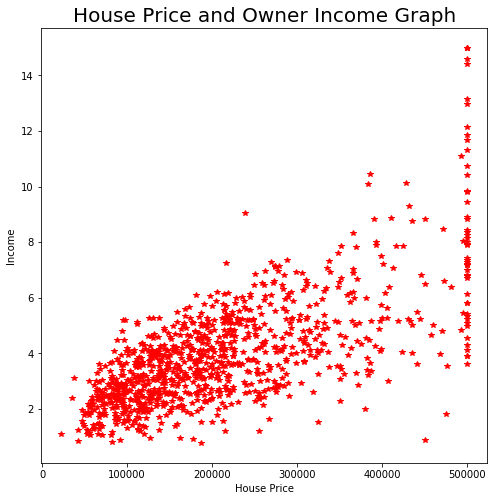

In [37]:
# Graph between income and house pricing first 1000 examples
fig = plt.figure(figsize=(8,8))
plt.plot(y_train.iloc[:1000],X_train['medianIncome'].iloc[:1000],"r*")
plt.xlabel("House Price")
plt.ylabel("Income ")
plt.title("House Price and Owner Income Graph",fontsize=20)

Text(0.5, 1.0, 'No of rooms and Owner Income Graph')

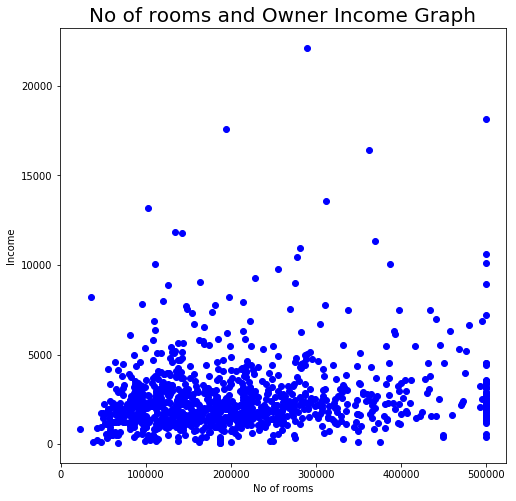

In [38]:
fig = plt.figure(figsize=(8,8))
plt.plot(y_train.iloc[:1000],X_train['totalRooms'].iloc[:1000],"bo")
plt.xlabel("No of rooms")
plt.ylabel("Income ")
plt.title("No of rooms and Owner Income Graph",fontsize=20)

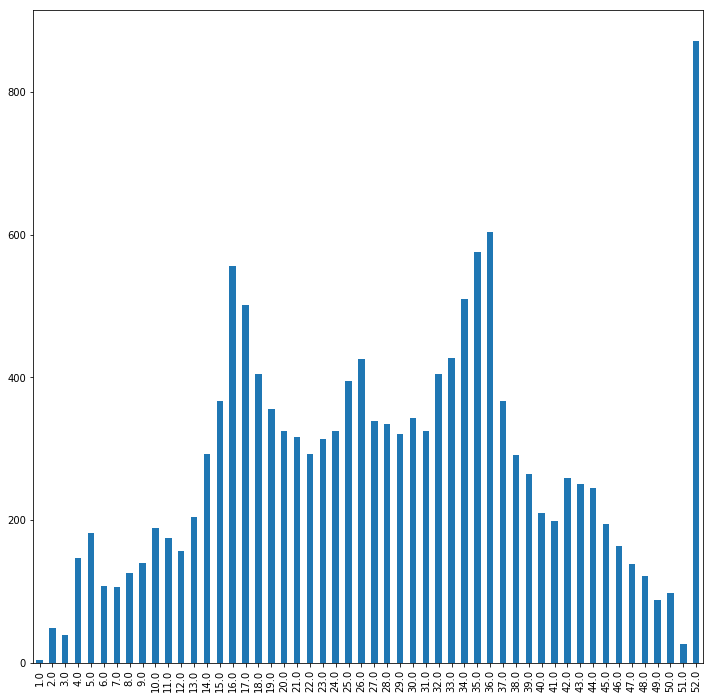

In [39]:
# No of houses sorted based on the age
fig = plt.figure(figsize=(12,12))
X_train['housingMedianAge'].value_counts().sort_index().plot.bar()

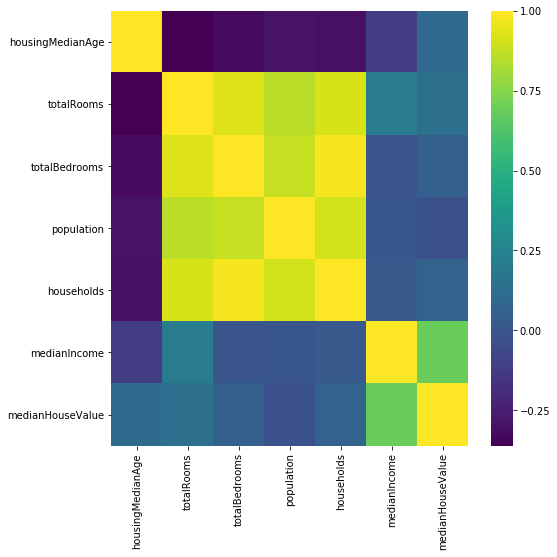

In [40]:

# Relation between valuees
fig = plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap='viridis')

<Figure size 576x576 with 0 Axes>

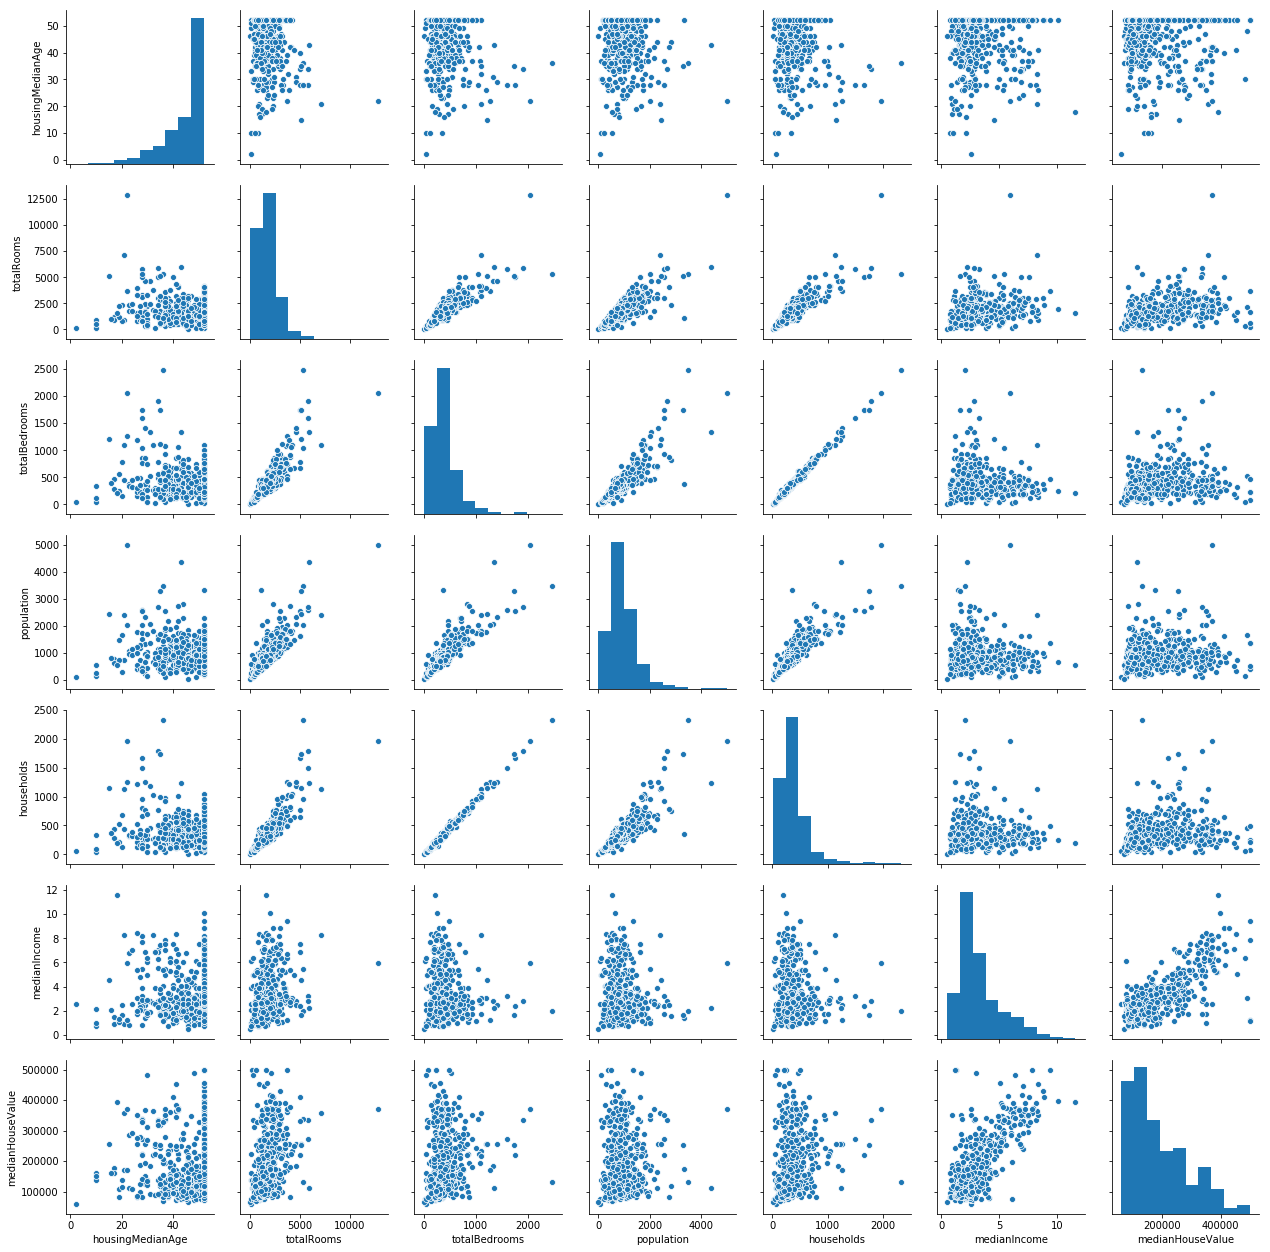

In [41]:
# Relation between all the data First 500 example (Plot matrix)
fig = plt.figure(figsize=(8,8))
sns.pairplot(data.iloc[:500,:])

## Feature Scaling using MinMax Scaler


In [42]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [44]:
X_train = pd.DataFrame( MMS().fit_transform(X=X_train), columns = X_train.columns,index = X_train.index)
X_test = pd.DataFrame(MMS().fit_transform(X=X_test),columns=X_test.columns,index=X_test.index)

## Creating the Feature Columns and Input function

In [45]:
X_train.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [46]:
col = X_train.columns

In [54]:
age = tf.feature_column.numeric_column(col[0])
rooms = tf.feature_column.numeric_column(col[1])
bedrooms = tf.feature_column.numeric_column(col[2])
population = tf.feature_column.numeric_column(col[3])
household = tf.feature_column.numeric_column(col[4])
income = tf.feature_column.numeric_column(col[5])

In [55]:
feat_cols = [age,rooms,bedrooms,population,household,income]

In [57]:
input_fun =tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [58]:
input_fun_test=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=20,num_epochs=1,shuffle=False)

## DNN Regressor estimator



In [76]:
model = tf.estimator.DNNRegressor(hidden_units=[12,12,12],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\cheta\\AppData\\Local\\Temp\\tmpuw7qp6n2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001ACF758FE80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [83]:
model.train(input_fn=input_fun,steps=100000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cheta\AppData\Local\Temp\tmpuw7qp6n2\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20000 into C:\Users\cheta\AppData\Local\Temp\tmpuw7qp6n2\model.ckpt.
INFO:tensorflow:loss = 103912735000.0, step = 20001
INFO:tensorflow:global_step/sec: 333.115
INFO:tensorflow:loss = 67577504000.0, step = 20101 (0.301 sec)
INFO:tensorflow:global_step/sec: 586.359
INFO:tensorflow:loss = 87428735000.0, step = 20201 (0.171 sec)
INFO:tensorflow:global_step/sec: 659.652
INFO:tensorflow:loss = 42002768000.0, step = 20301 (0.153 sec)
INFO:tensorflow:global_step/sec: 609.159
INFO:tensorflow:loss = 42825280000.0, step = 20401 (0.164 sec)
INFO:tensorflow:global_step/sec: 638.67
INFO:tensorflow:loss = 135244470000.0, ste

INFO:tensorflow:global_step/sec: 547.91
INFO:tensorflow:loss = 37268760000.0, step = 27501 (0.183 sec)
INFO:tensorflow:global_step/sec: 608.991
INFO:tensorflow:loss = 51644500000.0, step = 27601 (0.166 sec)
INFO:tensorflow:global_step/sec: 672.936
INFO:tensorflow:loss = 91348795000.0, step = 27701 (0.149 sec)
INFO:tensorflow:global_step/sec: 512.608
INFO:tensorflow:loss = 59900510000.0, step = 27801 (0.194 sec)
INFO:tensorflow:global_step/sec: 560.275
INFO:tensorflow:loss = 72450380000.0, step = 27901 (0.178 sec)
INFO:tensorflow:global_step/sec: 503.855
INFO:tensorflow:loss = 67033563000.0, step = 28001 (0.198 sec)
INFO:tensorflow:global_step/sec: 498.844
INFO:tensorflow:loss = 74862710000.0, step = 28101 (0.200 sec)
INFO:tensorflow:global_step/sec: 498.842
INFO:tensorflow:loss = 59650770000.0, step = 28201 (0.199 sec)
INFO:tensorflow:global_step/sec: 618.935
INFO:tensorflow:loss = 96101840000.0, step = 28301 (0.162 sec)
INFO:tensorflow:global_step/sec: 612.7
INFO:tensorflow:loss = 196

INFO:tensorflow:global_step/sec: 615.144
INFO:tensorflow:loss = 50793325000.0, step = 35401 (0.163 sec)
INFO:tensorflow:global_step/sec: 640.65
INFO:tensorflow:loss = 27658380000.0, step = 35501 (0.157 sec)
INFO:tensorflow:global_step/sec: 602.169
INFO:tensorflow:loss = 28731597000.0, step = 35601 (0.164 sec)
INFO:tensorflow:global_step/sec: 611.388
INFO:tensorflow:loss = 53682782000.0, step = 35701 (0.164 sec)
INFO:tensorflow:global_step/sec: 634.602
INFO:tensorflow:loss = 54134190000.0, step = 35801 (0.158 sec)
INFO:tensorflow:global_step/sec: 634.605
INFO:tensorflow:loss = 22141100000.0, step = 35901 (0.158 sec)
INFO:tensorflow:global_step/sec: 682.092
INFO:tensorflow:loss = 74426474000.0, step = 36001 (0.147 sec)
INFO:tensorflow:global_step/sec: 630.611
INFO:tensorflow:loss = 54690873000.0, step = 36101 (0.161 sec)
INFO:tensorflow:global_step/sec: 603.161
INFO:tensorflow:loss = 31876657000.0, step = 36201 (0.168 sec)
INFO:tensorflow:global_step/sec: 566.483
INFO:tensorflow:loss = 1

INFO:tensorflow:global_step/sec: 626.672
INFO:tensorflow:loss = 61218080000.0, step = 43301 (0.161 sec)
INFO:tensorflow:global_step/sec: 643.976
INFO:tensorflow:loss = 96176940000.0, step = 43401 (0.154 sec)
INFO:tensorflow:global_step/sec: 536.19
INFO:tensorflow:loss = 23401183000.0, step = 43501 (0.187 sec)
INFO:tensorflow:global_step/sec: 626.36
INFO:tensorflow:loss = 159732330000.0, step = 43601 (0.160 sec)
INFO:tensorflow:global_step/sec: 576.25
INFO:tensorflow:loss = 69852070000.0, step = 43701 (0.173 sec)
INFO:tensorflow:global_step/sec: 579.58
INFO:tensorflow:loss = 144008800000.0, step = 43801 (0.173 sec)
INFO:tensorflow:global_step/sec: 672.937
INFO:tensorflow:loss = 74929220000.0, step = 43901 (0.149 sec)
INFO:tensorflow:global_step/sec: 553.962
INFO:tensorflow:loss = 30984118000.0, step = 44001 (0.184 sec)
INFO:tensorflow:global_step/sec: 423.037
INFO:tensorflow:loss = 41387835000.0, step = 44101 (0.233 sec)
INFO:tensorflow:global_step/sec: 682.177
INFO:tensorflow:loss = 91

INFO:tensorflow:global_step/sec: 494.263
INFO:tensorflow:loss = 27346311000.0, step = 51201 (0.204 sec)
INFO:tensorflow:global_step/sec: 588.172
INFO:tensorflow:loss = 28896102000.0, step = 51301 (0.169 sec)
INFO:tensorflow:global_step/sec: 618.939
INFO:tensorflow:loss = 50898360000.0, step = 51401 (0.161 sec)
INFO:tensorflow:global_step/sec: 600.401
INFO:tensorflow:loss = 68893065000.0, step = 51501 (0.167 sec)
INFO:tensorflow:global_step/sec: 615.141
INFO:tensorflow:loss = 44068774000.0, step = 51601 (0.163 sec)
INFO:tensorflow:global_step/sec: 677.482
INFO:tensorflow:loss = 94821840000.0, step = 51701 (0.148 sec)
INFO:tensorflow:global_step/sec: 676.208
INFO:tensorflow:loss = 36194963000.0, step = 51801 (0.148 sec)
INFO:tensorflow:global_step/sec: 626.672
INFO:tensorflow:loss = 46114013000.0, step = 51901 (0.160 sec)
INFO:tensorflow:global_step/sec: 618.936
INFO:tensorflow:loss = 58134987000.0, step = 52001 (0.162 sec)
INFO:tensorflow:global_step/sec: 659.653
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 642.737
INFO:tensorflow:loss = 35498533000.0, step = 59101 (0.156 sec)
INFO:tensorflow:global_step/sec: 668.451
INFO:tensorflow:loss = 28009406000.0, step = 59201 (0.151 sec)
INFO:tensorflow:global_step/sec: 566.482
INFO:tensorflow:loss = 66946208000.0, step = 59301 (0.176 sec)
INFO:tensorflow:global_step/sec: 576.25
INFO:tensorflow:loss = 21423028000.0, step = 59401 (0.173 sec)
INFO:tensorflow:global_step/sec: 699.669
INFO:tensorflow:loss = 31235424000.0, step = 59501 (0.143 sec)
INFO:tensorflow:global_step/sec: 593.299
INFO:tensorflow:loss = 80726925000.0, step = 59601 (0.169 sec)
INFO:tensorflow:global_step/sec: 605.693
INFO:tensorflow:loss = 61399605000.0, step = 59701 (0.166 sec)
INFO:tensorflow:global_step/sec: 567.803
INFO:tensorflow:loss = 73656345000.0, step = 59801 (0.175 sec)
INFO:tensorflow:global_step/sec: 642.742
INFO:tensorflow:loss = 35170610000.0, step = 59901 (0.157 sec)
INFO:tensorflow:global_step/sec: 634.603
INFO:tensorflow:loss = 4

INFO:tensorflow:global_step/sec: 586.358
INFO:tensorflow:loss = 47877386000.0, step = 67001 (0.171 sec)
INFO:tensorflow:global_step/sec: 638.206
INFO:tensorflow:loss = 31704316000.0, step = 67101 (0.157 sec)
INFO:tensorflow:global_step/sec: 563.086
INFO:tensorflow:loss = 74006810000.0, step = 67201 (0.178 sec)
INFO:tensorflow:global_step/sec: 586.359
INFO:tensorflow:loss = 50822676000.0, step = 67301 (0.171 sec)
INFO:tensorflow:global_step/sec: 644.329
INFO:tensorflow:loss = 74325530000.0, step = 67401 (0.156 sec)
INFO:tensorflow:global_step/sec: 604.022
INFO:tensorflow:loss = 101413700000.0, step = 67501 (0.166 sec)
INFO:tensorflow:global_step/sec: 655.341
INFO:tensorflow:loss = 26741903000.0, step = 67601 (0.153 sec)
INFO:tensorflow:global_step/sec: 582.953
INFO:tensorflow:loss = 55218320000.0, step = 67701 (0.171 sec)
INFO:tensorflow:global_step/sec: 533.339
INFO:tensorflow:loss = 48324130000.0, step = 67801 (0.187 sec)
INFO:tensorflow:global_step/sec: 626.667
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 607.679
INFO:tensorflow:loss = 49325457000.0, step = 74901 (0.164 sec)
INFO:tensorflow:global_step/sec: 672.938
INFO:tensorflow:loss = 71027740000.0, step = 75001 (0.149 sec)
INFO:tensorflow:global_step/sec: 534.137
INFO:tensorflow:loss = 18251477000.0, step = 75101 (0.188 sec)
INFO:tensorflow:global_step/sec: 567.514
INFO:tensorflow:loss = 28292674000.0, step = 75201 (0.175 sec)
INFO:tensorflow:global_step/sec: 596.856
INFO:tensorflow:loss = 120738600000.0, step = 75301 (0.169 sec)
INFO:tensorflow:global_step/sec: 696.307
INFO:tensorflow:loss = 116165894000.0, step = 75401 (0.143 sec)
INFO:tensorflow:global_step/sec: 630.612
INFO:tensorflow:loss = 41654526000.0, step = 75501 (0.159 sec)
INFO:tensorflow:global_step/sec: 607.681
INFO:tensorflow:loss = 63610960000.0, step = 75601 (0.165 sec)
INFO:tensorflow:global_step/sec: 622.779
INFO:tensorflow:loss = 36550152000.0, step = 75701 (0.162 sec)
INFO:tensorflow:global_step/sec: 600.373
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 652.45
INFO:tensorflow:loss = 86616890000.0, step = 82801 (0.154 sec)
INFO:tensorflow:global_step/sec: 663.33
INFO:tensorflow:loss = 185923440000.0, step = 82901 (0.154 sec)
INFO:tensorflow:global_step/sec: 651.087
INFO:tensorflow:loss = 47263502000.0, step = 83001 (0.151 sec)
INFO:tensorflow:global_step/sec: 632.566
INFO:tensorflow:loss = 40763140000.0, step = 83101 (0.158 sec)
INFO:tensorflow:global_step/sec: 618.932
INFO:tensorflow:loss = 19412849000.0, step = 83201 (0.161 sec)
INFO:tensorflow:global_step/sec: 651.087
INFO:tensorflow:loss = 26723290000.0, step = 83301 (0.154 sec)
INFO:tensorflow:global_step/sec: 600.408
INFO:tensorflow:loss = 49079370000.0, step = 83401 (0.167 sec)
INFO:tensorflow:global_step/sec: 576.248
INFO:tensorflow:loss = 28540035000.0, step = 83501 (0.174 sec)
INFO:tensorflow:global_step/sec: 618.936
INFO:tensorflow:loss = 58795147000.0, step = 83601 (0.162 sec)
INFO:tensorflow:global_step/sec: 615.139
INFO:tensorflow:loss = 2

INFO:tensorflow:global_step/sec: 663.996
INFO:tensorflow:loss = 29203454000.0, step = 90701 (0.152 sec)
INFO:tensorflow:global_step/sec: 593.296
INFO:tensorflow:loss = 35181710000.0, step = 90801 (0.168 sec)
INFO:tensorflow:global_step/sec: 541.985
INFO:tensorflow:loss = 17768020000.0, step = 90901 (0.185 sec)
INFO:tensorflow:global_step/sec: 651.086
INFO:tensorflow:loss = 35449938000.0, step = 91001 (0.155 sec)
INFO:tensorflow:global_step/sec: 589.812
INFO:tensorflow:loss = 73742420000.0, step = 91101 (0.170 sec)
INFO:tensorflow:global_step/sec: 630.613
INFO:tensorflow:loss = 37600370000.0, step = 91201 (0.158 sec)
INFO:tensorflow:global_step/sec: 630.611
INFO:tensorflow:loss = 29098353000.0, step = 91301 (0.160 sec)
INFO:tensorflow:global_step/sec: 609.486
INFO:tensorflow:loss = 45794760000.0, step = 91401 (0.163 sec)
INFO:tensorflow:global_step/sec: 596.818
INFO:tensorflow:loss = 259184660000.0, step = 91501 (0.169 sec)
INFO:tensorflow:global_step/sec: 638.662
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 642.741
INFO:tensorflow:loss = 39177360000.0, step = 98601 (0.156 sec)
INFO:tensorflow:global_step/sec: 638.645
INFO:tensorflow:loss = 28568074000.0, step = 98701 (0.158 sec)
INFO:tensorflow:global_step/sec: 582.95
INFO:tensorflow:loss = 347469580000.0, step = 98801 (0.172 sec)
INFO:tensorflow:global_step/sec: 589.79
INFO:tensorflow:loss = 31552283000.0, step = 98901 (0.169 sec)
INFO:tensorflow:global_step/sec: 596.851
INFO:tensorflow:loss = 108294685000.0, step = 99001 (0.169 sec)
INFO:tensorflow:global_step/sec: 661.769
INFO:tensorflow:loss = 78259765000.0, step = 99101 (0.151 sec)
INFO:tensorflow:global_step/sec: 635.017
INFO:tensorflow:loss = 33223537000.0, step = 99201 (0.156 sec)
INFO:tensorflow:global_step/sec: 646.887
INFO:tensorflow:loss = 25364638000.0, step = 99301 (0.155 sec)
INFO:tensorflow:global_step/sec: 607.331
INFO:tensorflow:loss = 27521190000.0, step = 99401 (0.166 sec)
INFO:tensorflow:global_step/sec: 566.449
INFO:tensorflow:loss = 

INFO:tensorflow:loss = 33413415000.0, step = 106401 (0.162 sec)
INFO:tensorflow:global_step/sec: 569.705
INFO:tensorflow:loss = 24679870000.0, step = 106501 (0.176 sec)
INFO:tensorflow:global_step/sec: 596.825
INFO:tensorflow:loss = 115716506000.0, step = 106601 (0.169 sec)
INFO:tensorflow:global_step/sec: 643.321
INFO:tensorflow:loss = 113443110000.0, step = 106701 (0.156 sec)
INFO:tensorflow:global_step/sec: 592.937
INFO:tensorflow:loss = 38511760000.0, step = 106801 (0.169 sec)
INFO:tensorflow:global_step/sec: 598.565
INFO:tensorflow:loss = 40922325000.0, step = 106901 (0.165 sec)
INFO:tensorflow:global_step/sec: 628.593
INFO:tensorflow:loss = 12474748000.0, step = 107001 (0.160 sec)
INFO:tensorflow:global_step/sec: 607.682
INFO:tensorflow:loss = 31254155000.0, step = 107101 (0.164 sec)
INFO:tensorflow:global_step/sec: 618.938
INFO:tensorflow:loss = 31612471000.0, step = 107201 (0.163 sec)
INFO:tensorflow:global_step/sec: 582.947
INFO:tensorflow:loss = 65338380000.0, step = 107301 (

INFO:tensorflow:loss = 67201280000.0, step = 114201 (0.164 sec)
INFO:tensorflow:global_step/sec: 664.381
INFO:tensorflow:loss = 57495870000.0, step = 114301 (0.151 sec)
INFO:tensorflow:global_step/sec: 642.733
INFO:tensorflow:loss = 161715750000.0, step = 114401 (0.156 sec)
INFO:tensorflow:global_step/sec: 682.099
INFO:tensorflow:loss = 82936906000.0, step = 114501 (0.147 sec)
INFO:tensorflow:global_step/sec: 550.919
INFO:tensorflow:loss = 31938790000.0, step = 114601 (0.181 sec)
INFO:tensorflow:global_step/sec: 646.887
INFO:tensorflow:loss = 288573720000.0, step = 114701 (0.157 sec)
INFO:tensorflow:global_step/sec: 655.323
INFO:tensorflow:loss = 60243313000.0, step = 114801 (0.152 sec)
INFO:tensorflow:global_step/sec: 589.824
INFO:tensorflow:loss = 29764223000.0, step = 114901 (0.170 sec)
INFO:tensorflow:global_step/sec: 607.681
INFO:tensorflow:loss = 85014860000.0, step = 115001 (0.164 sec)
INFO:tensorflow:global_step/sec: 604.02
INFO:tensorflow:loss = 62207010000.0, step = 115101 (0

In [84]:
predict = model.predict(input_fn=input_fun_test)

In [85]:
predict = list(predict)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\cheta\AppData\Local\Temp\tmpuw7qp6n2\model.ckpt-120000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [86]:
y_predict =[]
for p in predict:
    y_predict.append(p['predictions'])

## Evaluting result using sklearn.metrices

In [87]:
from sklearn.metrics import mean_squared_error as error

In [88]:
error(y_test,y_predict) **0.5

80769.43749467935